#TRANSCRIPCION DE AUDIO DE GUITARRAS A NOTAS MUSICALES

## Obtencion de los datos

In [1]:
!mkdir GuitarSet

Anotaciones

In [2]:
!wget https://zenodo.org//record/3371780/files/annotation.zip?download=1 -O GuitarSet/annotation.zip

--2021-05-22 21:41:11--  https://zenodo.org//record/3371780/files/annotation.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39132574 (37M) [application/octet-stream]
Saving to: ‘GuitarSet/annotation.zip’

GuitarSet/annotatio 100%[===================>]  37.32M  16.9MB/s    in 2.2s    

2021-05-22 21:41:14 (16.9 MB/s) - ‘GuitarSet/annotation.zip’ saved [39132574/39132574]



In [3]:
!mkdir GuitarSet/annotation

In [4]:
!unzip -qq GuitarSet/annotation.zip -d GuitarSet/annotation

Audios

In [5]:
!wget https://zenodo.org//record/3371780/files/audio_mono-mic.zip?download=1 -O GuitarSet/audio_mono.zip

--2021-05-22 21:41:18--  https://zenodo.org//record/3371780/files/audio_mono-mic.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 656927981 (626M) [application/octet-stream]
Saving to: ‘GuitarSet/audio_mono.zip’

GuitarSet/audio_mon 100%[===================>] 626.50M  16.1MB/s    in 44s     

2021-05-22 21:42:03 (14.3 MB/s) - ‘GuitarSet/audio_mono.zip’ saved [656927981/656927981]



In [6]:
!mkdir GuitarSet/audio_mono

In [7]:
!unzip -qq GuitarSet/audio_mono.zip -d GuitarSet/audio_mono

## Pre procesamiento de los datos

In [8]:
!pip install jams

     |████████████████████████████████| 61kB 2.4MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 
  Created wheel for jams: filename=jams-0.3.4-cp37-none-any.whl size=64926 sha256=f8874c779b62badba4066896752cdfc40857e58a423ef972282d4aecf9a61540
  Stored in directory: /root/.cache/pip/wheels/2b/b8/c7/092096a3af0eb864cca4e79a44bc883dee5b9767da2c6f8ab3
  Created wheel for mir-eval: filename=mir_eval-0.6-cp37-none-any.whl size=96515 sha256=7d8e581434eb083db3a156231acc1a7a2752e5544944cdaf4544b0f2fb658de8
  Stored in directory: /root/.cache/pip/wheels/49/ce/30/730fa72addf275e49d90683b01b3613048b4be3bf7ff8eb6ec
Successfully built jams mir-eval
ERROR: nbclient 0.5.3 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0


In [9]:
import jams
import cv2
import pandas as pd
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np
import re
import librosa
import librosa.display
import math  

In [10]:
annotation_path = "/content/GuitarSet/annotation"
annotation_list = os.listdir(annotation_path)
annotation_list.sort()
len(annotation_list)

360

In [11]:
annotation_list[0:5]

['00_BN1-129-Eb_comp.jams',
 '00_BN1-129-Eb_solo.jams',
 '00_BN1-147-Gb_comp.jams',
 '00_BN1-147-Gb_solo.jams',
 '00_BN2-131-B_comp.jams']

In [12]:
audio_path = "/content/GuitarSet/audio_mono"
audio_list = os.listdir(audio_path)
audio_list.sort()
len(audio_list)

360

In [13]:
audio_list[0:5]

['00_BN1-129-Eb_comp_mic.wav',
 '00_BN1-129-Eb_solo_mic.wav',
 '00_BN1-147-Gb_comp_mic.wav',
 '00_BN1-147-Gb_solo_mic.wav',
 '00_BN2-131-B_comp_mic.wav']

### Anotaciones

In [14]:
jams_file = jams.load(annotation_path + '/' + annotation_list[0])

In [15]:
jams_file.file_metadata.title

'00_BN1-129-Eb_comp'

In [16]:
jams_file.annotations[-3].data

SortedKeyList([Observation(time=0.0, duration=7.441860465116279, value='D#:maj', confidence=None), Observation(time=7.441860465116279, duration=3.72093023255814, value='G#:maj', confidence=None), Observation(time=11.162790697674419, duration=3.720930232558139, value='D#:maj', confidence=None), Observation(time=14.883720930232558, duration=1.8604651162790713, value='A#:maj', confidence=None), Observation(time=16.74418604651163, duration=1.8604651162790695, value='G#:maj', confidence=None), Observation(time=18.6046511627907, duration=3.71974883720927, value='D#:maj', confidence=None)], key=<bound method Annotation._key of <class 'jams.core.Annotation'>>)

In [17]:
jams_file.annotations[-3].data[0]

Observation(time=0.0, duration=7.441860465116279, value='D#:maj', confidence=None)

In [18]:
for notes_list in jams_file.annotations[-3].data:
  print('time: ' + str(notes_list.time) + '|duration: ' + str(notes_list.duration) + '|Note: ' + notes_list.value)

time: 0.0|duration: 7.441860465116279|Note: D#:maj
time: 7.441860465116279|duration: 3.72093023255814|Note: G#:maj
time: 11.162790697674419|duration: 3.720930232558139|Note: D#:maj
time: 14.883720930232558|duration: 1.8604651162790713|Note: A#:maj
time: 16.74418604651163|duration: 1.8604651162790695|Note: G#:maj
time: 18.6046511627907|duration: 3.71974883720927|Note: D#:maj


Notas unicas

In [19]:
notas = []

for annotation_archive in tqdm(annotation_list):
  jams_file = jams.load(annotation_path + '/' + annotation_archive)
  for notes_list in jams_file.annotations[-3].data:
    notas.append(notes_list.value)

Salida!!

In [20]:
notas = list(set(notas))
notas.sort()
print(notas)
print(len(notas))

['A#:7', 'A#:hdim7', 'A#:maj', 'A#:min', 'A:7', 'A:hdim7', 'A:maj', 'A:min', 'B:maj', 'B:min', 'C#:7', 'C#:hdim7', 'C#:maj', 'C#:min', 'C:7', 'C:hdim7', 'C:maj', 'C:min', 'D#:7', 'D#:maj', 'D#:min', 'D:7', 'D:maj', 'D:min', 'E:7', 'E:hdim7', 'E:maj', 'E:min', 'F#:7', 'F#:maj', 'F#:min', 'F:7', 'F:hdim7', 'F:maj', 'F:min', 'G#:7', 'G#:hdim7', 'G#:maj', 'G#:min', 'G:hdim7', 'G:maj', 'G:min']
42


### Creacion de un Dataframe con los datos que nos interesan de las anotaciones

In [21]:
annotations_notes_data = pd.DataFrame(columns=['NOMBRE', 'TIEMPO', 'DURACION', 'NOTA'])

In [22]:
NOMBRES_ANOTACIONES = []
TIEMPOS = []
DURACIONES = []
NOTAS = []

for annotation_archive in tqdm(annotation_list):
  
  jams_file = jams.load(annotation_path + '/' + annotation_archive)

  nombre = jams_file.file_metadata.title
  tiempos_archivo = []
  duraciones_archivo = []
  notas_archivo = []

  for notes_list in jams_file.annotations[-3].data:
    
    tiempos_archivo.append(notes_list.time)
    duraciones_archivo.append(notes_list.duration)
    notas_archivo.append(notes_list.value)

  NOMBRES_ANOTACIONES.append(nombre)
  TIEMPOS.append(tiempos_archivo)
  DURACIONES.append(duraciones_archivo)
  NOTAS.append(notas_archivo)

In [23]:
annotations_notes_data['NOMBRE'] = NOMBRES_ANOTACIONES
annotations_notes_data['TIEMPO'] = TIEMPOS
annotations_notes_data['DURACION'] = DURACIONES
annotations_notes_data['NOTA'] = NOTAS

In [24]:
annotations_notes_data

,NOMBRE,TIEMPO,DURACION,NOTA
0,00_BN1-129-Eb_comp,"[0.0, 7.441860465116279, 11.162790697674419, 1...","[7.441860465116279, 3.72093023255814, 3.720930...","[D#:maj, G#:maj, D#:maj, A#:maj, G#:maj, D#:maj]"
1,00_BN1-129-Eb_solo,"[0.0, 7.441860465116279, 11.162790697674419, 1...","[7.441860465116279, 3.72093023255814, 3.720930...","[D#:maj, G#:maj, D#:maj, A#:maj, G#:maj, D#:maj]"
2,00_BN1-147-Gb_comp,"[0.0, 6.530612244897959, 9.795918367346939, 13...","[6.530612244897959, 3.2653061224489797, 3.2653...","[F#:maj, B:maj, F#:maj, C#:maj, B:maj, F#:maj]"
3,00_BN1-147-Gb_solo,"[0.0, 6.530612244897959, 9.795918367346939, 13...","[6.530612244897959, 3.2653061224489797, 3.2653...","[F#:maj, B:maj, F#:maj, C#:maj, B:maj, F#:maj]"
4,00_BN2-131-B_comp,"[0.0, 1.83206106870229, 3.66412213740458, 5.49...","[1.83206106870229, 1.83206106870229, 1.8320610...","[E:min, A:7, D:maj, G:maj, C#:hdim7, F#:7, B:m..."
...,...,...,...,...
355,05_SS2-88-F_solo,"[0.0, 2.727272727272727, 5.454545454545454, 8....","[2.727272727272727, 2.727272727272727, 2.72727...","[A#:min, D#:7, G#:maj, C#:maj, G:hdim7, C:7, F..."
356,05_SS3-84-Bb_comp,"[0.0, 2.857142857142857, 5.714285714285714, 8....","[2.857142857142857, 2.857142857142857, 2.85714...","[A#:maj, F:maj, G:min, D:min, D#:maj, A#:maj, ..."
357,05_SS3-84-Bb_solo,"[0.0, 2.857142857142857, 5.714285714285714, 8....","[2.857142857142857, 2.857142857142857, 2.85714...","[A#:maj, F:maj, G:min, D:min, D#:maj, A#:maj, ..."
358,05_SS3-98-C_comp,"[0.0, 2.4489795918367347, 4.8979591836734695, ...","[2.4489795918367347, 2.4489795918367347, 2.448...","[C:maj, G:maj, A:min, E:min, F:maj, C:maj, F:m..."


### Audios

In [25]:
librosa_audio, librosa_sample_rate = librosa.load(audio_path + '/' + audio_list[0])

In [26]:
librosa_sample_rate

22050

In [27]:
librosa_audio.shape

(492253,)

In [28]:
len(librosa_audio)/librosa_sample_rate

22.32439909297052

In [29]:
from IPython.display import Audio
Audio(librosa_audio, rate=librosa_sample_rate)

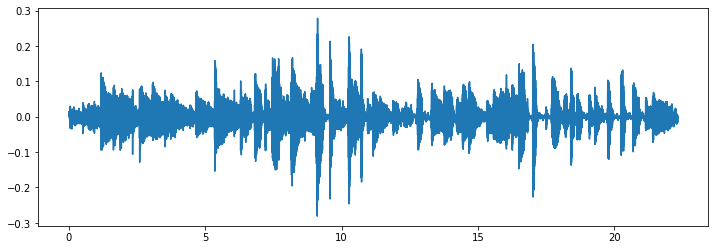

In [30]:
time = np.arange(0, len(librosa_audio)) / librosa_sample_rate
# Librosa: mono track
plt.figure(figsize=(12,4))
plt.plot(time,librosa_audio)
plt.savefig('librosa_audio.png')

In [31]:
fmin = 0            
fmax = 22050 

hop_length = 512
n_fft = 1024  

mel_spec = librosa.feature.melspectrogram(librosa_audio, sr=librosa_sample_rate,hop_length=hop_length, n_fft=n_fft, fmin=fmin, fmax=fmax)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [32]:
mel_spec_db.shape

(128, 962)

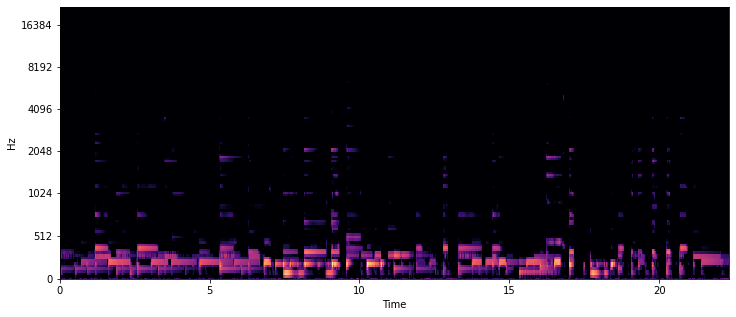

In [33]:
plt.figure(figsize=(12,5))
img=librosa.display.specshow(mel_spec_db, x_axis='time',  y_axis='mel', 
                         sr=librosa_sample_rate,
                         fmin=fmin, fmax=fmax)

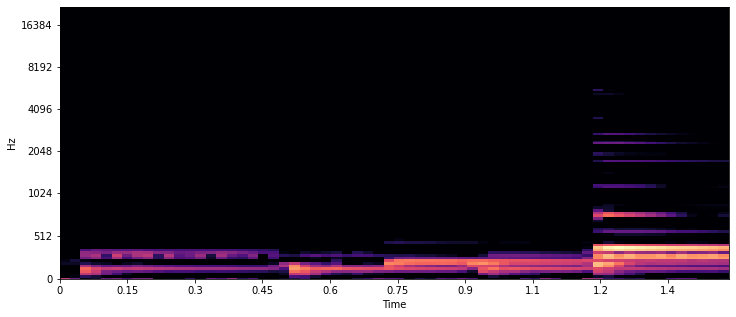

In [34]:
plt.figure(figsize=(12,5))
img=librosa.display.specshow(mel_spec_db[:,0:64], x_axis='time',  y_axis='mel', 
                         sr=librosa_sample_rate,
                         fmin=fmin, fmax=fmax)

In [35]:
fmin = 0            
fmax = 22050 

hop_length = 256
n_fft = 1024  

mel_spec = librosa.feature.melspectrogram(librosa_audio, sr=librosa_sample_rate,hop_length=hop_length, n_fft=n_fft, fmin=fmin, fmax=fmax)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [36]:
mel_spec_db.shape

(128, 1923)

In [37]:
mel_spec_db.dtype

dtype('float32')

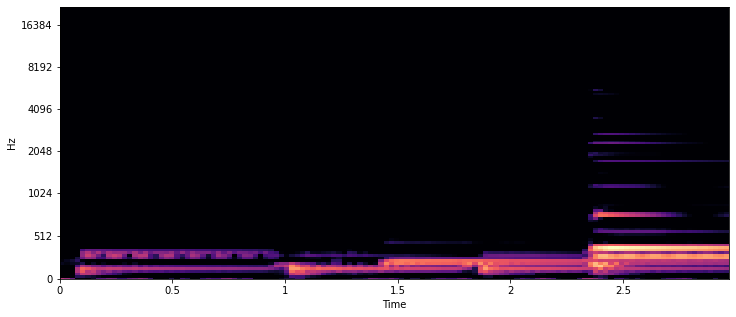

In [38]:
plt.figure(figsize=(12,5))
img=librosa.display.specshow(mel_spec_db[:,0:128], x_axis='time',  y_axis='mel', 
                         sr=librosa_sample_rate,
                         fmin=fmin, fmax=fmax)

hop_length = 512 : 128 -> 3 seg |
64 -> 1.5 seg |
32 -> 0.75 seg

Añadimos resolucion temporal para que podamos obtener ventanas de 128x128 a 1.5 segundos

hop_length = 256 : 128 -> 1.5 seg |
64 -> 0.75 seg |
32 -> 0.375 seg

### Creacion de un Dataframe con los datos del spectograma de Mel de las canciones

In [39]:
mel_spectogram_data = pd.DataFrame(columns=['NOMBRE', 'ESPECTROGRAMA'])

In [40]:
NOMBRES_AUDIOS = []
ESPECTROGRAMAS = []


for song_archive in tqdm(audio_list):

  librosa_audio, librosa_sample_rate = librosa.load(audio_path + '/' + song_archive)

  fmin = 0            
  fmax = 22050 

  hop_length = 256
  n_fft = 1024  

  mel_spec = librosa.feature.melspectrogram(librosa_audio, sr=librosa_sample_rate,hop_length=hop_length, n_fft=n_fft, fmin=fmin, fmax=fmax)
  mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

  NOMBRES_AUDIOS.append(song_archive[:-4])
  ESPECTROGRAMAS.append(mel_spec_db.tolist())


/usr/local/lib/python3.7/dist-packages/librosa/filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


In [41]:
mel_spectogram_data['NOMBRE'] = NOMBRES_AUDIOS
mel_spectogram_data['ESPECTROGRAMA'] = ESPECTROGRAMAS

In [42]:
mel_spectogram_data

,NOMBRE,ESPECTROGRAMA
0,00_BN1-129-Eb_comp_mic,"[[-53.51353073120117, -56.60468292236328, -64...."
1,00_BN1-129-Eb_solo_mic,"[[-63.167144775390625, -63.69972229003906, -76..."
2,00_BN1-147-Gb_comp_mic,"[[-80.0, -80.0, -80.0, -80.0, -75.910308837890..."
3,00_BN1-147-Gb_solo_mic,"[[-80.0, -78.0273208618164, -80.0, -74.1144256..."
4,00_BN2-131-B_comp_mic,"[[-80.0, -80.0, -80.0, -76.22482299804688, -80..."
...,...,...
355,05_SS2-88-F_solo_mic,"[[-80.0, -80.0, -80.0, -79.52522277832031, -80..."
356,05_SS3-84-Bb_comp_mic,"[[-80.0, -80.0, -80.0, -75.5269775390625, -77...."
357,05_SS3-84-Bb_solo_mic,"[[-68.678466796875, -78.48970031738281, -80.0,..."
358,05_SS3-98-C_comp_mic,"[[-72.67764282226562, -80.0, -80.0, -80.0, -80..."


## Preparacion de datos para el entrenamiento

Se van a etrar muestras de cada espectrograma a 1.5 segundos con su respectiva nota de salida, para de este modo crear los datos que entraran a la red neuronal

In [43]:
Input_sprectograms = []
label_output = []

step_time_size = 1.5/128

for i in tqdm(range(annotations_notes_data.shape[0])):

  annotation_data = annotations_notes_data.iloc[i]
  audio_data = mel_spectogram_data.iloc[i]

  espec = audio_data['ESPECTROGRAMA']
  espec = [[float(j) for j in i] for i in espec]
  espec = np.asarray(espec, dtype=np.float32)

  for j in range(len(annotation_data['NOTA'])):

    if float(annotation_data['DURACION'][j]) > 1.5:

      number_of_cuts = math.floor(float(annotation_data['DURACION'][j])/1.5)

      if number_of_cuts > 0:

        tensor_cut =  round(float(annotation_data['TIEMPO'][j])/step_time_size)

        for k in range(number_of_cuts):

          tensor_slice = espec[:,tensor_cut:tensor_cut+128]
          tensor_cut = tensor_cut + 128

          Input_sprectograms.append(tensor_slice)
          label_output.append(annotation_data['NOTA'][j])

          
Input_sprectograms = np.stack(Input_sprectograms).astype('float32')

In [44]:
len(label_output)

5280

In [45]:
Input_sprectograms.shape

(5280, 128, 128)

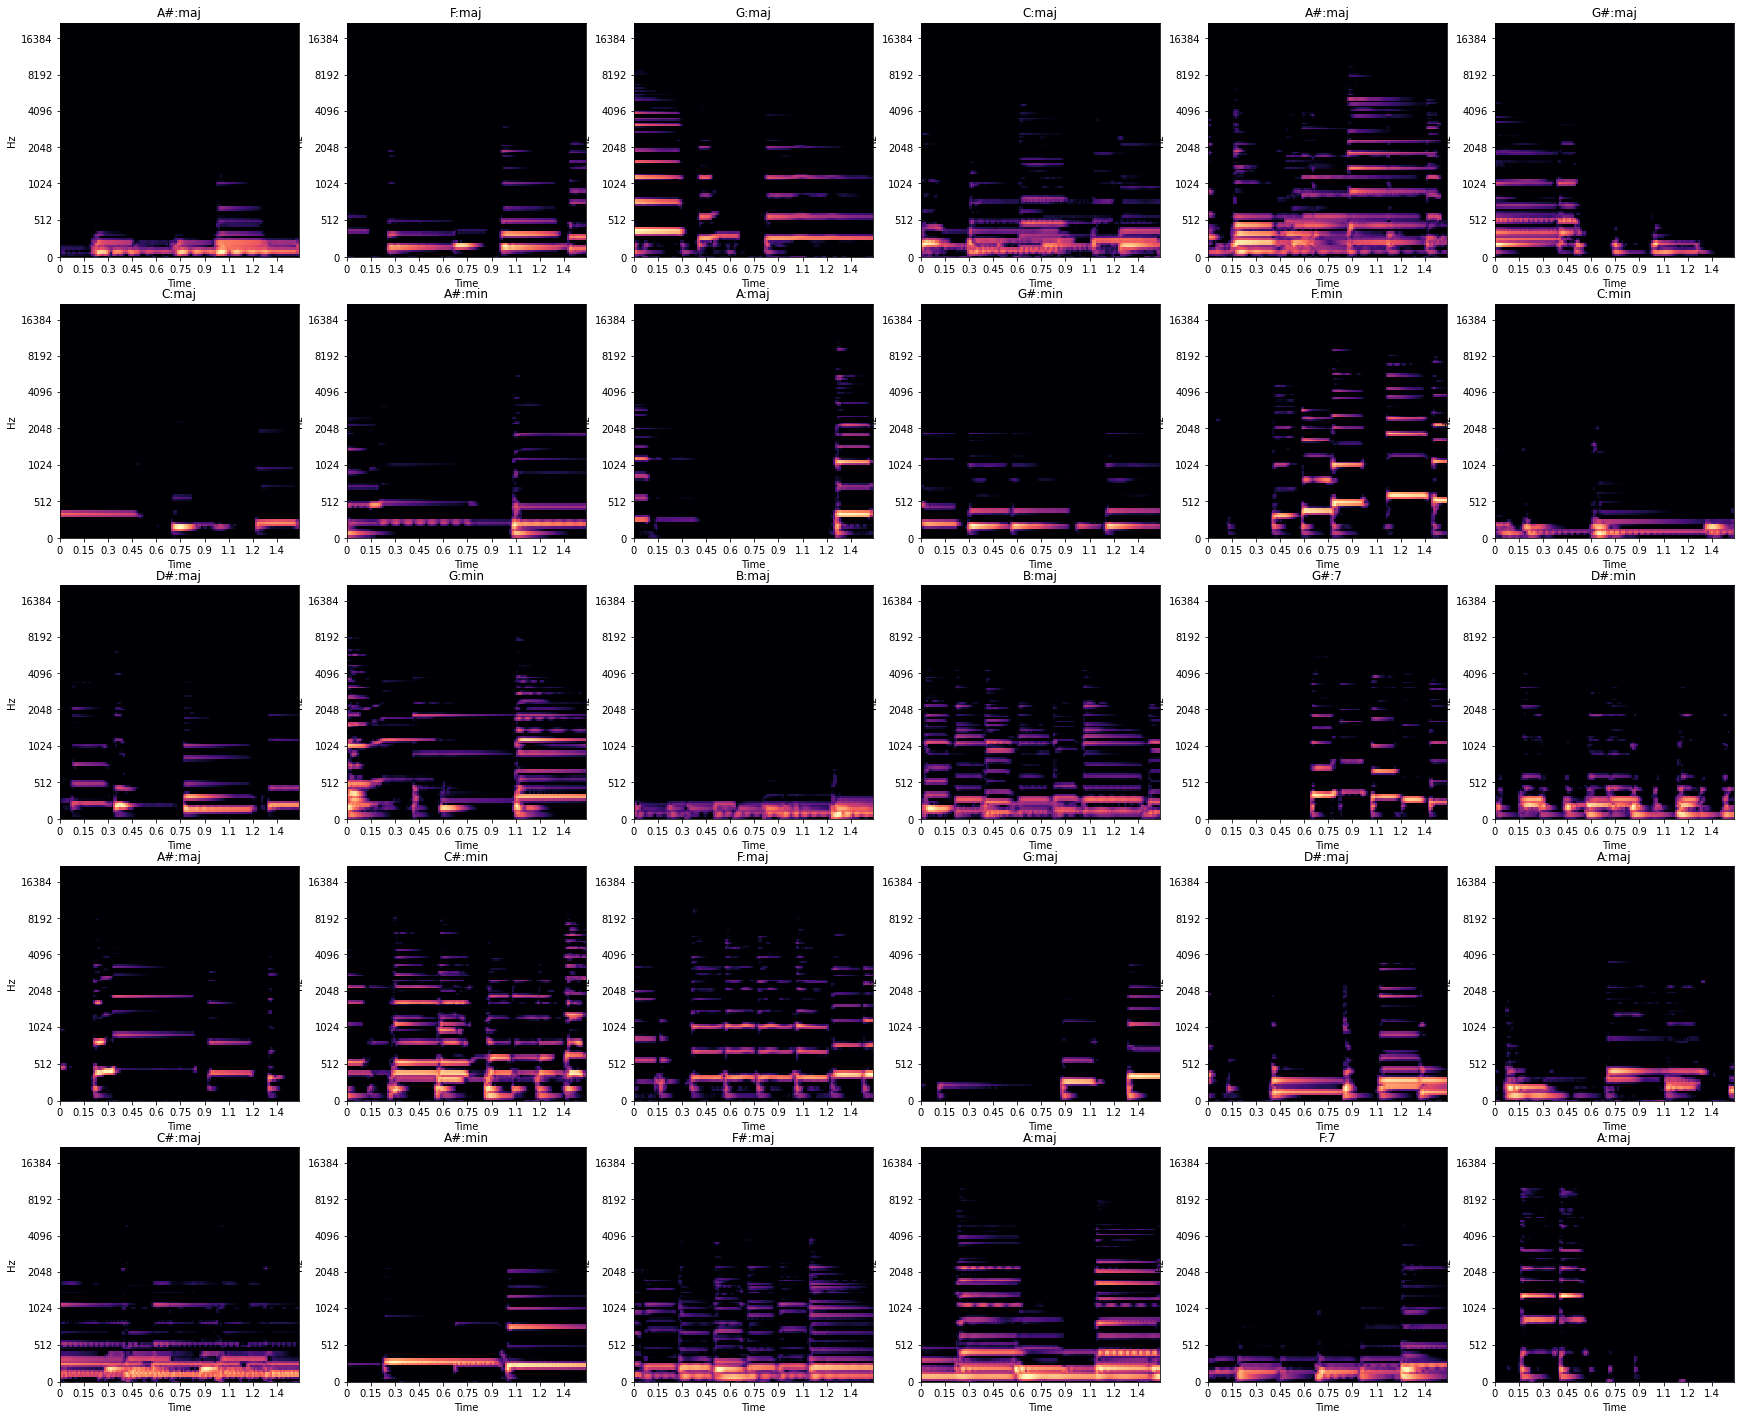

In [46]:
number_of_images = 30

plt.figure(figsize=(30,25))
for i in range(number_of_images):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    azar=np.random.randint(len(label_output))
    img=librosa.display.specshow(Input_sprectograms[azar], x_axis='time',  y_axis='mel', 
                         sr=22050*2,
                         fmin=fmin, fmax=fmax)
    plt.title(label_output[azar])

plt.show()

Codificacion de la salida en one-hot

In [47]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [48]:
notas_label_econded = label_encoder.fit_transform(notas)
notas_label_econded = notas_label_econded.reshape(len(notas_label_econded), 1)

In [49]:
label_encoder.transform([label_output[0]])[0]

19

In [50]:
label_encoder.inverse_transform([19])[0]

'D#:maj'

In [51]:
label_output_label_encoded = label_encoder.transform(label_output)

In [52]:
label_output_label_encoded = label_output_label_encoded.reshape(len(label_output_label_encoded), 1)

In [53]:
label_output_label_encoded.shape

(5280, 1)

In [54]:
one_hot_encoder.fit(notas_label_econded)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [55]:
notas_onehot_encoded = one_hot_encoder.transform(notas_label_econded).toarray()

In [56]:
notas_onehot_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [57]:
label_output_onehot_encoded = one_hot_encoder.transform(label_output_label_encoded).toarray()

In [58]:
label_output_onehot_encoded.shape

(5280, 42)

In [59]:
one_hot_encoder.inverse_transform([label_output_onehot_encoded[0]])[0]

array([19])

# Entrenamiento de los modelos

In [60]:
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose,UpSampling2D, Flatten, Reshape, MaxPool2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.utils import plot_model

from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split

Normalizado de los datos de entrada

In [61]:
scaled_input_sprectograms = (Input_sprectograms - Input_sprectograms.mean())/Input_sprectograms.std()
scaled_input_sprectograms = np.expand_dims(scaled_input_sprectograms , axis=3)

In [62]:
scaled_input_sprectograms.shape

(5280, 128, 128, 1)

In [63]:
label_output_onehot_encoded.shape

(5280, 42)

Separacion entre datos de entranamiento y prueba

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_input_sprectograms, label_output_onehot_encoded, test_size=0.2, random_state=42)

print('Numero de datos de entrenamiento: ' + str(X_train.shape[0]))
print('Numero de datos de prueba: ' + str(X_test.shape[0]))

Numero de datos de entrenamiento: 4224
Numero de datos de prueba: 1056


# MODELO MK01

Model: "note_classffier_mk01"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)     

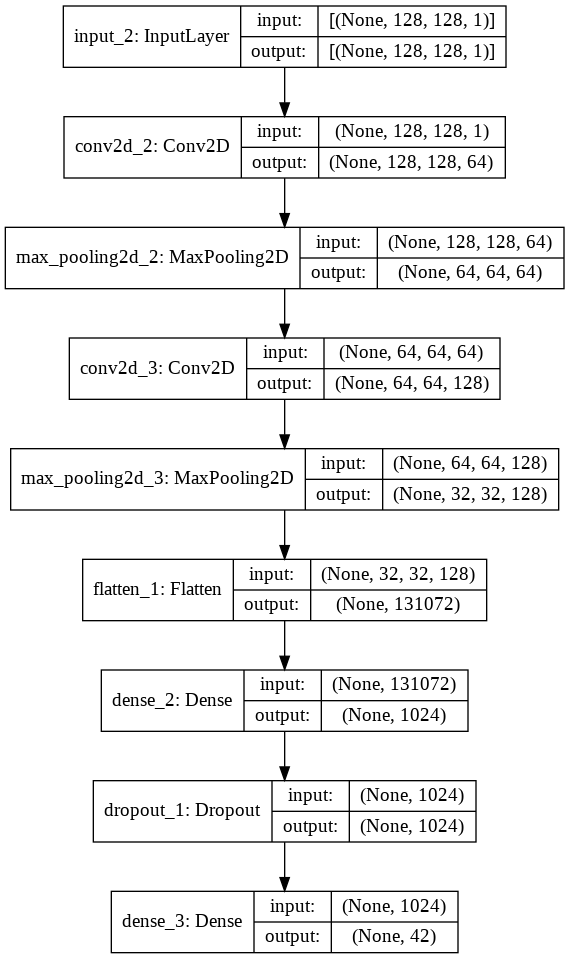

In [84]:
input_shape = X_train.shape[1:]
output_size = Y_train.shape[1:][0]

inputs = Input(shape = input_shape) 

x = inputs 

x = Conv2D(filters = 64, kernel_size = 3, activation ='tanh',  padding ='same')(x)
x = MaxPool2D(pool_size=(2,2))(x)
x = Conv2D(filters = 128, kernel_size = 3, activation ='tanh',  padding ='same')(x) 
x = MaxPool2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(1024, activation='tanh')(x)
x = Dropout(0.2)(x) 
x = Dense(output_size, activation='softmax')(x)

note_classffier_mk01 = Model(inputs, x, name ='note_classffier_mk01')

note_classffier_mk01.summary()
plot_model(note_classffier_mk01, to_file='./note_classffier_mk01.png',show_shapes=True)

Callbacks

In [85]:
# prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'note_classffier_mk01.{epoch:03d}.h5'
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# reduce learning rate by sqrt(0.1) if the loss does not improve in 5 epochs
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=3,
                               verbose=1,
                               min_lr=0.5e-6)

# save weights for future use (e.g. reload parameters w/o training)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True)


# called every epoch
#callbacks = [lr_reducer, checkpoint]
callbacks = [lr_reducer]

In [86]:
note_classffier_mk01.compile(loss= 'categorical_crossentropy',
                  optimizer= 'adam',
                   metrics=['accuracy'])

In [92]:
epochs = 30
batch_size = 128

history=note_classffier_mk01.fit(X_train,
                Y_train,
                validation_data=(X_test, Y_test),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=callbacks)

Epoch 1/30
33/33 [==============================] - 3s 98ms/step - loss: 3.5655 - accuracy: 0.0722 - val_loss: 3.3433 - val_accuracy: 0.0994
Epoch 2/30
33/33 [==============================] - 3s 92ms/step - loss: 3.4772 - accuracy: 0.0926 - val_loss: 3.0621 - val_accuracy: 0.2263
Epoch 3/30
33/33 [==============================] - 3s 93ms/step - loss: 2.9977 - accuracy: 0.2420 - val_loss: 2.3698 - val_accuracy: 0.3911
Epoch 4/30
33/33 [==============================] - 3s 91ms/step - loss: 2.3735 - accuracy: 0.3875 - val_loss: 1.6551 - val_accuracy: 0.5379
Epoch 5/30
33/33 [==============================] - 3s 91ms/step - loss: 1.8017 - accuracy: 0.4953 - val_loss: 1.1184 - val_accuracy: 0.7008
Epoch 6/30
33/33 [==============================] - 3s 92ms/step - loss: 1.2673 - accuracy: 0.6513 - val_loss: 0.7044 - val_accuracy: 0.8466
Epoch 7/30
33/33 [==============================] - 3s 91ms/step - loss: 0.8690 - accuracy: 0.7708 - val_loss: 0.4540 - val_accuracy: 0.9157
Epoch 8/30
33

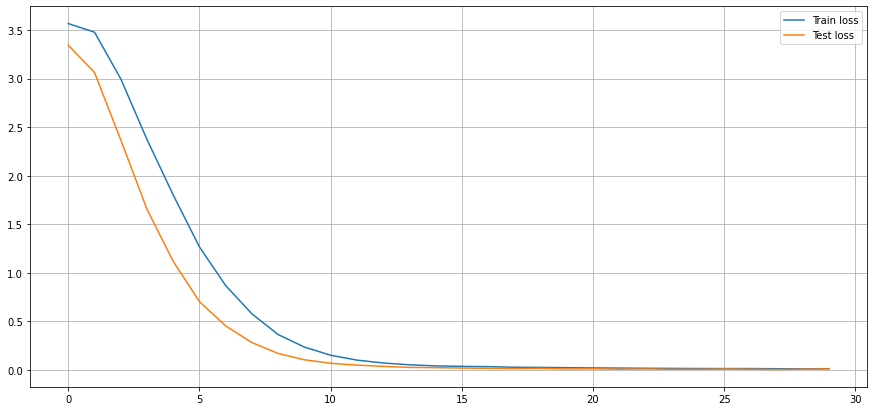

In [93]:
plt.figure(figsize=(15,7))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend()
plt.grid()
plt.show()

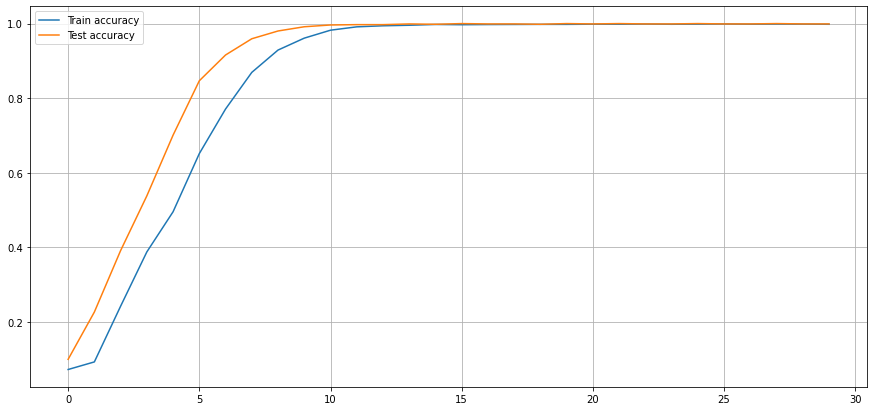

In [95]:
plt.figure(figsize=(15,7))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Test accuracy')
plt.legend()
plt.grid()
plt.show()

Evalucion del modelo

In [113]:
Y_pred = note_classffier_mk01.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test.argmax(axis=1), Y_pred.argmax(axis=1))

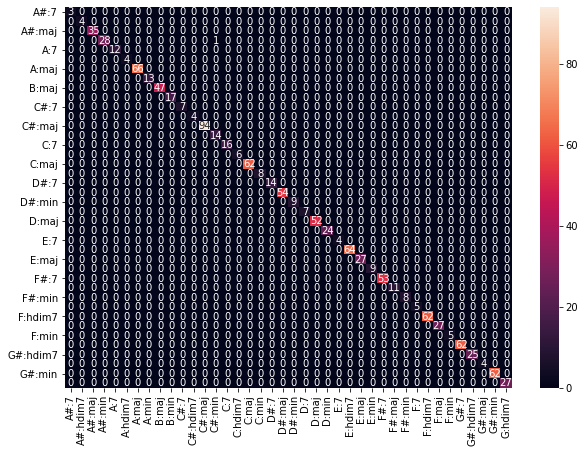

In [118]:
import seaborn as sn

df_cm = pd.DataFrame(matrix, index = notas,
                  columns = notas)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)